In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv("flood.csv")
df

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21279,2,3,3,5,3,6,1,4,4,4,...,7,9,2,7,5,6,5,5,7,0.455
21280,8,6,0,4,3,4,5,4,8,7,...,3,6,4,4,5,5,6,7,4,0.500
21281,6,5,5,5,2,3,4,5,8,1,...,2,6,7,2,11,4,3,6,5,0.480
21282,1,3,7,4,7,4,6,3,3,6,...,3,3,6,7,7,10,7,5,5,0.505


In [36]:
df.shape

(21284, 21)

In [37]:
df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [38]:
df.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

<Axes: >

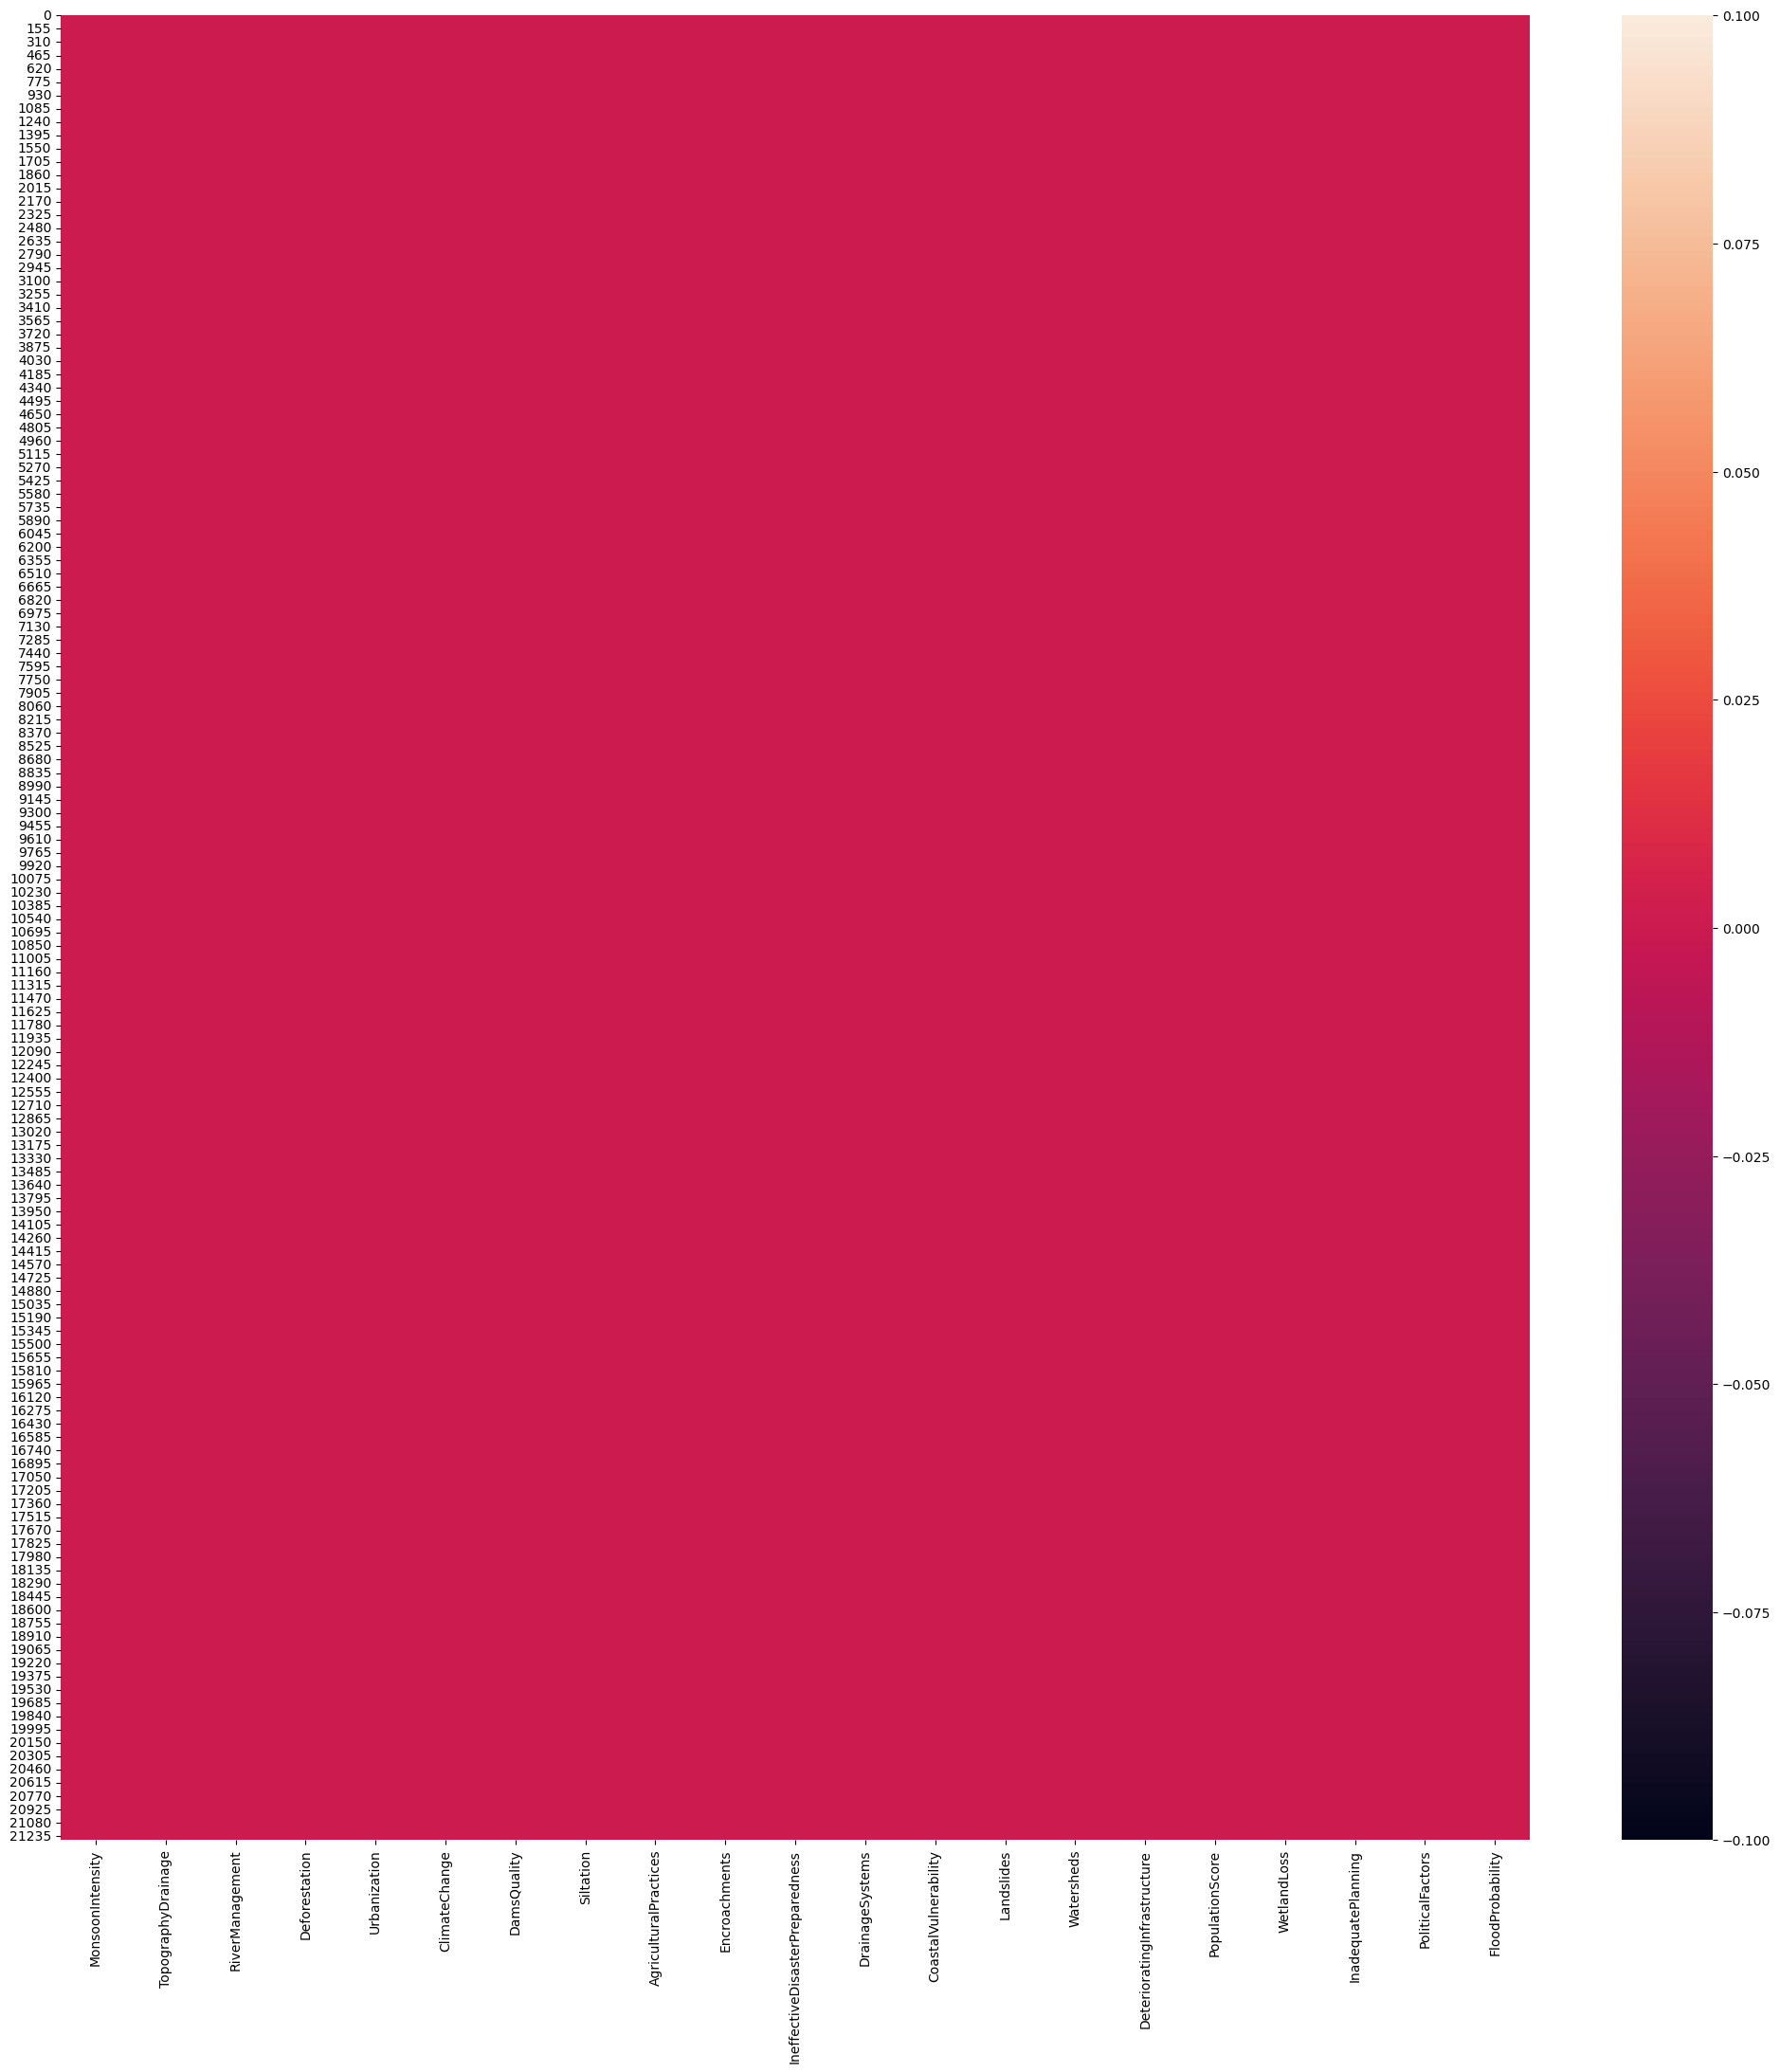

In [39]:
# for check fillup missing values [company,agent] # apply heat map
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

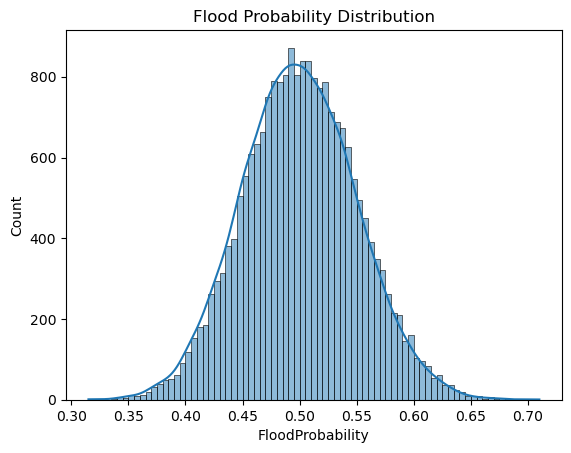

In [40]:
# Flood Probability Data Distribution
sns.histplot(x=df['FloodProbability'], data=df, kde=True)
plt.title("Flood Probability Distribution")
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.model_selection import train_test_split

X=df.drop('FloodProbability', axis=1)
y=df.FloodProbability.copy()

#training and testing split using all feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) #stratify only for classification not regression

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (17027, 20)
Shape of y_train =  (17027,)
Shape of X_test =  (4257, 20)
Shape of y_test =  (4257,)


In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [46]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

# using LinearRegression

In [47]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X,y)

LinearRegression()

In [48]:
lr.coef_

array([0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
       0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
       0.005, 0.005])

In [49]:
lr.intercept_

-1.6653345369377348e-16

In [51]:
y_pred=(X_test)

In [53]:
lr.score(X_test,y_test)

1.0

# using DecisionTreeRegressor

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
regressor = DecisionTreeRegressor(criterion='squared_error')
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [55]:
y_test

4710     0.560
11543    0.450
16924    0.535
18349    0.420
7554     0.455
         ...  
6026     0.455
2508     0.490
20913    0.510
4998     0.490
2227     0.535
Name: FloodProbability, Length: 4257, dtype: float64

In [57]:
regressor.score(X_test,y_test)

0.09204892100975082

# using RandomForestRegressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
Regressor=RandomForestRegressor(criterion="squared_error")
Regressor.fit(X_train,y_train)

RandomForestRegressor()

In [59]:
y_test

4710     0.560
11543    0.450
16924    0.535
18349    0.420
7554     0.455
         ...  
6026     0.455
2508     0.490
20913    0.510
4998     0.490
2227     0.535
Name: FloodProbability, Length: 4257, dtype: float64

In [60]:
Regressor.score(X_test,y_test)

0.7043884530856719

# using svr

In [28]:
from sklearn.svm import SVR

In [61]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [62]:
svr_rbf=SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train)
svr_rbf.score(X_test, y_test)

0.6093238948376745

In [63]:
svr_linear=SVR(kernel='linear')
svr_linear.fit(X_train, y_train)
svr_linear.score(X_test, y_test)

0.6683780145195869

In [64]:
svr_linear=SVR(kernel='poly')
svr_linear.fit(X_train, y_train)
svr_linear.score(X_test, y_test)

0.3606215678418927

# using KNeighborsRegressor

In [65]:
from sklearn.neighbors import KNeighborsRegressor

In [66]:
regressor = KNeighborsRegressor(n_neighbors=9)
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [67]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [68]:
sc.fit(X_train)

StandardScaler()

In [69]:
regressor.score(X_test,y_test)

0.7570784071336802

# using k fold

In [70]:
from sklearn.model_selection import cross_val_score

In [72]:
score_lr=cross_val_score(KNeighborsRegressor(n_neighbors=5), X,y,cv=3)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.73812916 0.73693396 0.73915525]
Avg : 0.7380727891428723


In [73]:
score_lr1=cross_val_score(KNeighborsRegressor(n_neighbors=9), X,y,cv=3)
print(score_lr1)
print("Avg :",np.average(score_lr1))

[0.75249301 0.75331081 0.75587069]
Avg : 0.7538915027892378


In [82]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [83]:
y_pred=lr.predict(X_test)

In [84]:
y_test

4710     0.560
11543    0.450
16924    0.535
18349    0.420
7554     0.455
         ...  
6026     0.455
2508     0.490
20913    0.510
4998     0.490
2227     0.535
Name: FloodProbability, Length: 4257, dtype: float64

In [85]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 5.835386463703988e-17


In [86]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 6.640002022030205e-33


In [87]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 8.148620755704737e-17


In [88]:
print("r_squared",r2_score(y_test,y_pred))

r_squared 1.0


# k fold on RandomForestRegressor

In [80]:
score_rf=cross_val_score(RandomForestRegressor(n_estimators=5),X_train,y_train,cv=5)
print(score_rf)
print("Avg:",np.average(score_rf))

[0.55387397 0.57118168 0.56747261 0.56713774 0.55240351]
Avg: 0.5624139013834855


In [81]:
score_rf2=cross_val_score(RandomForestRegressor(n_estimators=100),X_train,y_train,cv=6)
print(score_rf2)
print("Avg:",np.average(score_rf2))

[0.69145466 0.69968764 0.70290686 0.69639595 0.70184939 0.69310877]
Avg: 0.6975672115106898
